# Chapter 13: Bayesian Inference

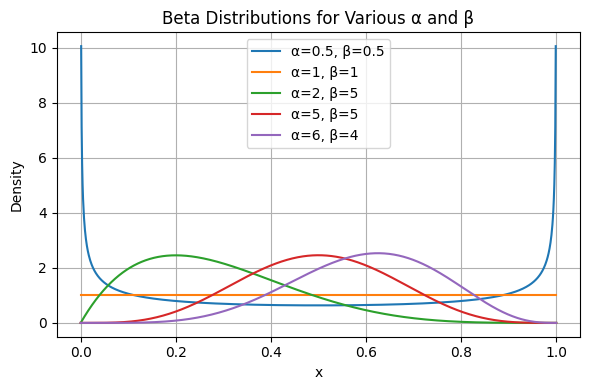

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

# Define the range for x
x = np.linspace(0, 1, 1000)

# Define different (alpha, beta) pairs
params = [(0.5, 0.5), (1,1), (2, 5), (5, 5), (6,4)]

# Plot the Beta distributions
plt.figure(figsize=(6, 4))

for a, b in params:
    y = beta.pdf(x, a, b)
    plt.plot(x, y, label=f'α={a}, β={b}')

plt.title('Beta Distributions for Various α and β')
plt.xlabel('x')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## Example 1

95% credible interval: (0.49, 0.87)


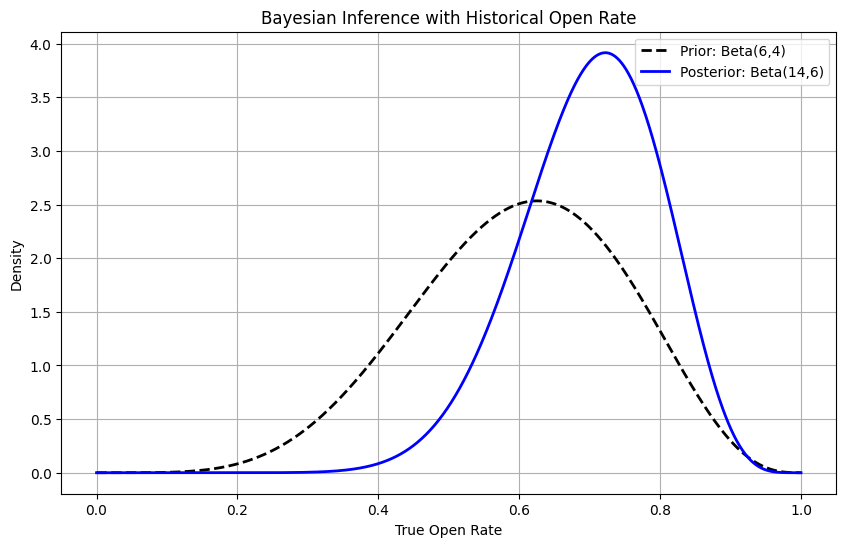

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta
  # Observed data
emails_sent = 10
opens = 8
failures = emails_sent - opens
  # Prior: based on historical open rate
alpha_prior = 6
beta_prior = 4
  # Posterior update
alpha_post = alpha_prior + opens
beta_post = beta_prior + failures
  # Plot prior and posterior
theta = np.linspace(0, 1, 1000)
prior_pdf = beta.pdf(theta, alpha_prior, beta_prior)
posterior_pdf = beta.pdf(theta, alpha_post, beta_post)
  # To compute the credible interval:
ci_lower, ci_upper = beta.ppf([0.025, 0.975], alpha_post, beta_post)
print(f"95% credible interval: ({ci_lower:.2f}, {ci_upper:.2f})")
  # Plotting
plt.figure(figsize=(10, 6))
plt.plot(theta, prior_pdf, 'k--', label='Prior: Beta(6,4)', linewidth=2)
plt.plot(theta, posterior_pdf, 'b-', label=f'Posterior: Beta({alpha_post},{beta_post})', linewidth=2)
plt.title('Bayesian Inference with Historical Open Rate')
plt.xlabel('True Open Rate')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()


## Example 2

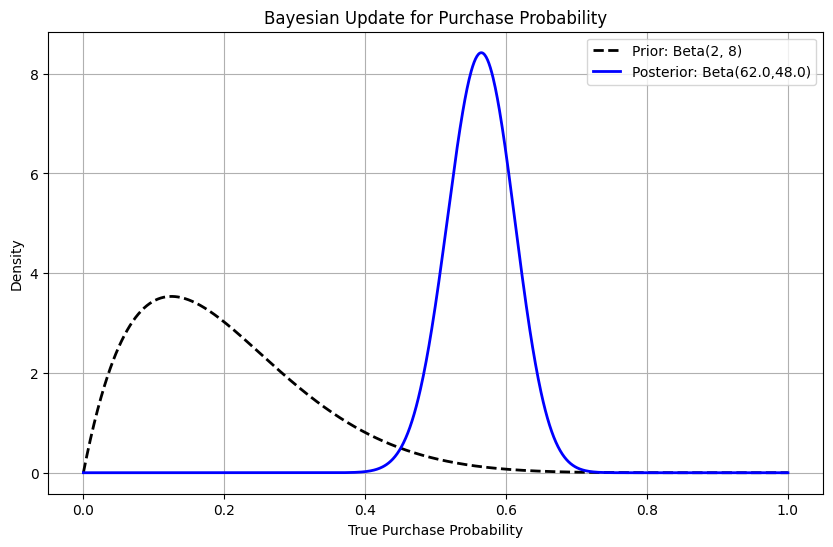

Prior Probability of Purchase: 0.2
Posterior Probability of Purchase (given View): 0.33


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

# Given data
P_purchase = 0.2
P_view_given_purchase = 0.6
P_view_given_nonpurchase = 0.3

# Beta Prior parameters (Alpha, Beta)
alpha_prior = 2
beta_prior = 8

# Posterior update with new data (we use Bayes' Rule)
P_nonpurchase = 1 - P_purchase

# P(View) is the total probability of viewing the product
P_view = P_view_given_purchase * P_purchase + P_view_given_nonpurchase * P_nonpurchase

# Calculate the Posterior Probability using Bayes' Rule
posterior_probability = (P_view_given_purchase * P_purchase) / P_view

# Visualizing prior, likelihood, and posterior
theta = np.linspace(0, 1, 1000)

# Prior: Beta distribution with parameters alpha_prior and beta_prior
prior_pdf = beta.pdf(theta, alpha_prior, beta_prior)

# Posterior: Beta distribution updated with new data
alpha_post = alpha_prior + P_view_given_purchase * 100  # Use a large number of clicks as evidence for strong update
beta_post = beta_prior + (1 - P_view_given_purchase) * 100  # Similarly, update the failure side

posterior_pdf = beta.pdf(theta, alpha_post, beta_post)

# Plot prior and posterior distributions
plt.figure(figsize=(10, 6))
plt.plot(theta, prior_pdf, 'k--', label='Prior: Beta(2, 8)', linewidth=2)
plt.plot(theta, posterior_pdf, 'b-', label=f'Posterior: Beta({alpha_post},{beta_post})', linewidth=2)
plt.title('Bayesian Update for Purchase Probability')
plt.xlabel('True Purchase Probability')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

# Output results
print(f"Prior Probability of Purchase: {P_purchase}")
print(f"Posterior Probability of Purchase (given View): {posterior_probability:.2f}")


### Example 3

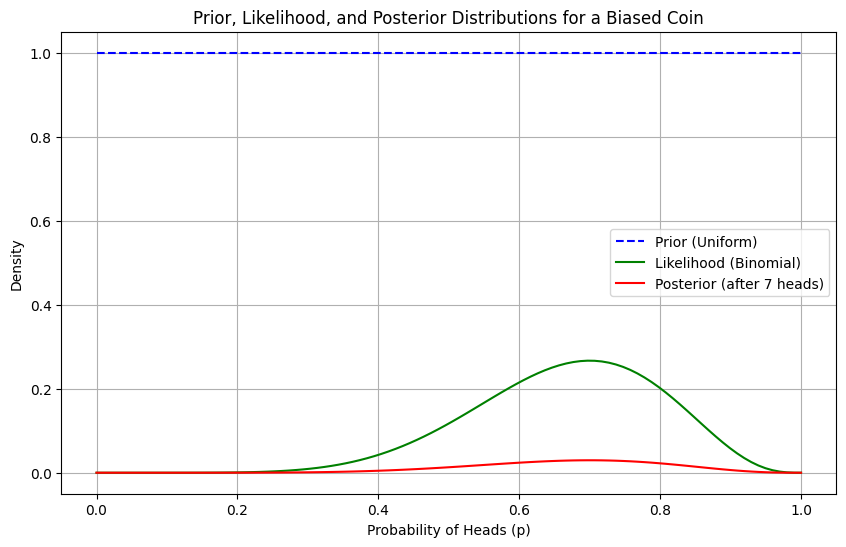

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom

# Observed data
flips = 10
heads = 7  # Number of heads observed
tails = flips - heads  # Number of tails observed

# Probability of heads (p) - ranging from 0 to 1
p = np.linspace(0, 1, 100)

# Prior (uniform distribution, assumed to be equal likelihood for any p)
prior = np.ones_like(p)

# Likelihood function (binomial distribution)
likelihood = binom.pmf(heads, flips, p)

# Posterior (Bayes' rule: likelihood * prior)
posterior = likelihood * prior
posterior /= np.sum(posterior)  # Normalize to make it a valid probability distribution

# Plotting the prior, likelihood, and posterior distributions
plt.figure(figsize=(10, 6))
plt.plot(p, prior, label='Prior (Uniform)', color='blue', linestyle='--')
plt.plot(p, likelihood, label='Likelihood (Binomial)', color='green')
plt.plot(p, posterior, label='Posterior (after 7 heads)', color='red')
plt.title('Prior, Likelihood, and Posterior Distributions for a Biased Coin')
plt.xlabel('Probability of Heads (p)')
plt.ylabel('Density')
plt.legend()
plt.grid()
plt.show()